In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
fakeOrders = pd.read_csv("project_dataset/fake_orders_test.csv")

In [3]:
fake = fakeOrders.copy()

In [4]:
print(fake.isnull().sum())

order_id                 0
activation_time_local    0
country_code             0
store_address            0
final_status             0
payment_status           0
products                 0
products_total           0
purchase_total_price     0
dtype: int64


In [5]:
fake.sample(10)

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
36461,32588237,2019-03-04 22:09:55.000000,TR,66134,CanceledStatus,PAID,1,7.38,0.00
56327,32170840,2019-03-01 20:02:21.000000,CR,36590,DeliveredStatus,PAID,2,10.29,14.05
24278,32915936,2019-03-07 13:27:22.000000,UA,67084,DeliveredStatus,PAID,1,6.22,6.32
9465,33370548,2019-03-09 19:37:00.000000,CR,58180,DeliveredStatus,PAID,3,10.98,10.98
14024,33172729,2019-03-08 22:53:04.000000,IT,23409,DeliveredStatus,PAID,1,12.50,12.50
4692,33477584,2019-03-10 14:17:19.000000,EC,54679,CanceledStatus,PAID,1,3.03,0.00
42225,32505696,2019-03-03 21:30:07.000000,AR,16569,DeliveredStatus,PAID,1,0.79,4.31
970,33540950,2019-03-10 21:14:58.000000,UY,29022,DeliveredStatus,PAID,7,12.73,10.05
41534,32464179,2019-03-03 23:19:44.000000,TR,64273,DeliveredStatus,PAID,2,1.80,1.80
2200,33465228,2019-03-10 19:38:54.000000,ES,16342,DeliveredStatus,PAID,5,9.78,7.22


In [6]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60400 entries, 0 to 60399
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               60400 non-null  int64  
 1   activation_time_local  60400 non-null  object 
 2   country_code           60400 non-null  object 
 3   store_address          60400 non-null  int64  
 4   final_status           60400 non-null  object 
 5   payment_status         60400 non-null  object 
 6   products               60400 non-null  int64  
 7   products_total         60400 non-null  float64
 8   purchase_total_price   60400 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 4.1+ MB


In [10]:
fake['activation_time_local'] = pd.to_datetime(fake['activation_time_local'])
fake['day'] = fake['activation_time_local'].dt.date
fake['hour'] = fake['activation_time_local'].dt.hour
fake.sample(10)

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,day,hour,subauthorized
31871,32717514,2019-03-05 20:28:35,IT,6590,CanceledStatus,PAID,6,9.94,0.00,2019-03-05,20,False
27968,32825651,2019-03-06 18:18:46,ES,16351,DeliveredStatus,PAID,3,3.39,10.15,2019-03-06,18,True
43583,32490831,2019-03-03 19:21:38,AR,61625,DeliveredStatus,NOT_PAID,2,12.25,13.69,2019-03-03,19,True
38734,32562452,2019-03-04 17:14:53,IT,10696,CanceledStatus,PAID,4,18.45,0.00,2019-03-04,17,False
9771,33356836,2019-03-09 19:03:45,PE,51479,DeliveredStatus,PAID,4,6.45,6.45,2019-03-09,19,False
6954,33376688,2019-03-09 23:29:39,AR,62504,CanceledStatus,PAID,1,4.75,4.75,2019-03-09,23,False
9712,33281791,2019-03-09 19:11:17,MA,53871,DeliveredStatus,PAID,2,9.15,9.61,2019-03-09,19,True
58614,32019961,2019-03-01 13:57:40,RO,70000,DeliveredStatus,PAID,1,32.67,31.61,2019-03-01,13,False
5626,33434945,2019-03-10 12:50:47,AR,33362,DeliveredStatus,PAID,1,6.05,6.70,2019-03-10,12,True
55141,32157567,2019-03-01 21:31:21,AR,63072,DeliveredStatus,PAID,3,18.61,18.87,2019-03-01,21,True


In [11]:
# Crear la columna subauthorized (1 si el pedido está subautorizado, 0 en caso contrario)
fake['subauthorized'] = fake['products_total'] < fake['purchase_total_price']

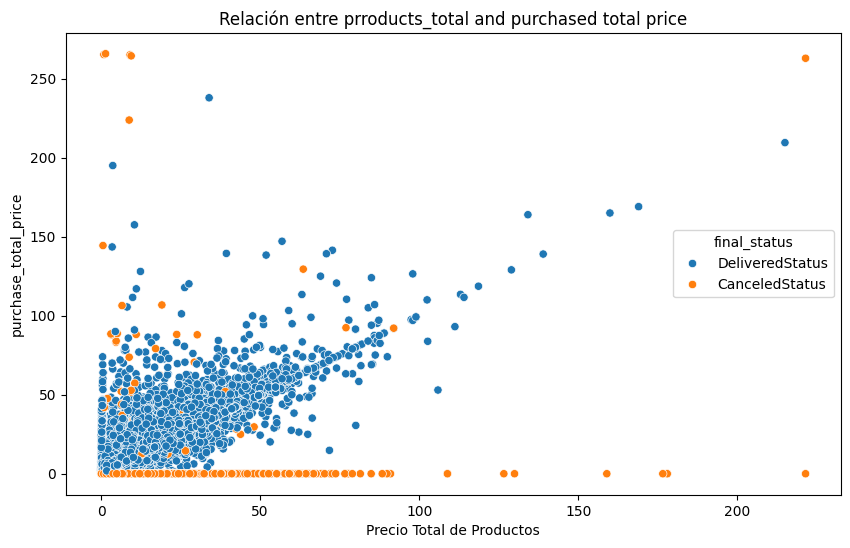

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fake, x='products_total', y='purchase_total_price', hue='final_status')
plt.title('Relación entre prroducts_total and purchased total price')
plt.xlabel('Precio Total de Productos')
plt.ylabel('purchase_total_price')
plt.show()

In [63]:
# Calcular el porcentaje de pedidos subautorizados
subauthorized_percentage = fake['subauthorized'].mean() * 100
print(f"Porcentaje de pedidos subautorizados: {subauthorized_percentage:.2f}%")


Porcentaje de pedidos subautorizados: 57.58%


In [95]:
 #Calcular el porcentaje de pedidos subautorizados y el total de pedidos por país
subauthorized_by_country = fake.groupby('country_code').agg(
    total_orders=('order_id', 'size'),
    subauthorized_orders=('subauthorized', 'sum')
).reset_index()

subauthorized_by_country['subauthorized_percentage'] = (subauthorized_by_country['subauthorized_orders'] / subauthorized_by_country['total_orders']) * 100
subauthorized_by_country = subauthorized_by_country.sort_values(by='subauthorized_percentage', ascending=False)
# Mostrar el DataFrame resultante
print(subauthorized_by_country)

   country_code  total_orders  subauthorized_orders  subauthorized_percentage
3            CL          1104                   961                 87.047101
9            FR          2136                  1402                 65.636704
6            EC          2508                  1611                 64.234450
5            DO           500                   318                 63.600000
7            EG          1828                  1150                 62.910284
8            ES         12806                  7965                 62.197407
15           PA          1013                   616                 60.809477
0            AR         13192                  7994                 60.597332
18           PT           909                   528                 58.085809
13           KE            94                    53                 56.382979
16           PE          4785                  2675                 55.903866
12           IT          2808                  1553             

In [97]:
# Filtrar los datos para España
fake_spain = fake[fake['country_code'] == 'ES']

In [141]:
# Calcular el total de pedidos y pedidos subautorizados por día
orders_per_day_spain = fake_spain.groupby('day').agg(
    total_orders1=('order_id', 'size'),
    subauthorized_orders=('subauthorized', 'sum')
).reset_index()

orders_per_day_spain['subauthorized_percentage'] = (orders_per_day_spain['subauthorized_orders'] / orders_per_day_spain['total_orders1']) * 100
orders_per_day_spain


,day,total_orders1,subauthorized_orders,subauthorized_percentage
0,2019-03-01,1315,825,62.737643
1,2019-03-02,1647,1036,62.902247
2,2019-03-03,1028,558,54.280156
3,2019-03-04,1305,856,65.593870
4,2019-03-05,1208,704,58.278146
5,2019-03-06,1234,788,63.857374
6,2019-03-07,1182,765,64.720812
7,2019-03-08,1326,833,62.820513
8,2019-03-09,1629,1060,65.070595
9,2019-03-10,932,540,57.939914


In [107]:
# Calcular el total de pedidos y pedidos subautorizados por hora del día
orders_per_hour_spain = fake_spain.groupby('hour').agg(
    total_orders2=('order_id', 'size'),
    subauthorized_orders=('subauthorized', 'sum')
).reset_index()

orders_per_hour_spain['subauthorized_percentage'] = (orders_per_hour_spain['subauthorized_orders'] / orders_per_hour_spain['total_orders2']) * 100

orders_per_hour_spain


,hour,total_orders2,subauthorized_orders,subauthorized_percentage
0,0,15,5,33.333333
1,7,1,1,100.000000
2,8,25,17,68.000000
3,9,171,127,74.269006
4,10,654,477,72.935780
5,11,506,358,70.750988
6,12,645,432,66.976744
7,13,1143,753,65.879265
8,14,1051,653,62.131304
9,15,788,514,65.228426


/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_8856/2743102585.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


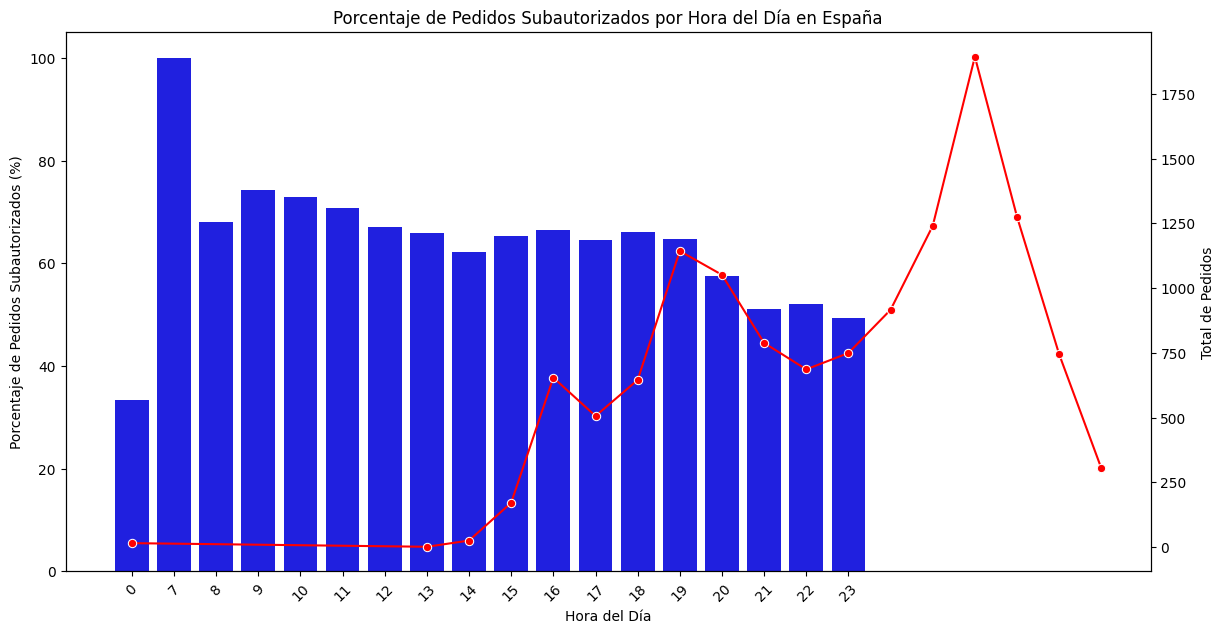

In [108]:
# Crear la visualización por hora del día
fig, ax1 = plt.subplots(figsize=(14, 7))

# Crear el gráfico de barras para el porcentaje de pedidos subautorizados por hora del día
sns.barplot(data=orders_per_hour_spain, x='hour', y='subauthorized_percentage', ax=ax1, color='blue')
ax1.set_title('Porcentaje de Pedidos Subautorizados por Hora del Día en España')
ax1.set_xlabel('Hora del Día')
ax1.set_ylabel('Porcentaje de Pedidos Subautorizados (%)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Crear el eje Y secundario para el total de pedidos por hora del día
ax2 = ax1.twinx()
sns.lineplot(data=orders_per_hour_spain, x='hour', y='total_orders2', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Total de Pedidos')

plt.show()


In [90]:
no_hour_info_spain = fake_spain[fake_spain['activation_time_local'].dt.time == pd.to_datetime('00:00:00').time()]

# Contar la cantidad de estos pedidos
no_hour_info_spain_count = no_hour_info_spain.shape[0]

# Mostrar el resultado
print(f"Cantidad de pedidos en España que no tienen información de la hora: {no_hour_info_spain_count}")

Cantidad de pedidos en España que no tienen información de la hora: 0


In [109]:
# Crear la columna authorized_incremental (1 si el pedido se autorizaría con un incremento del 20%, 0 en caso contrario)
fake['authorized_incremental'] = fake['products_total'] * 1.20 >= fake['purchase_total_price']

# Calcular el porcentaje de pedidos que se autorizarían correctamente con la autorización incremental
authorized_incremental_percentage = fake['authorized_incremental'].mean() * 100
print(f"Porcentaje de pedidos autorizados correctamente con una autorización incremental: {authorized_incremental_percentage:.2f}%")


Porcentaje de pedidos autorizados correctamente con una autorización incremental: 69.03%


In [110]:
# Calcular el porcentaje de pedidos subautorizados por país
subauthorized_by_country = fake.groupby('country_code')['subauthorized'].mean() * 100
print("Porcentaje de pedidos subautorizados por país:")
print(subauthorized_by_country)

# Calcular el porcentaje de pedidos autorizados correctamente con una autorización incremental por país
authorized_incremental_by_country = fake.groupby('country_code')['authorized_incremental'].mean() * 100
print("\nPorcentaje de pedidos autorizados correctamente con una autorización incremental por país:")
print(authorized_incremental_by_country)


Porcentaje de pedidos subautorizados por país:
country_code
AR    60.597332
BR    50.000000
CI    33.333333
CL    87.047101
CR    44.896116
DO    63.600000
EC    64.234450
EG    62.910284
ES    62.197407
FR    65.636704
GE    51.831502
GT    33.156966
IT    55.306268
KE    56.382979
MA    40.686275
PA    60.809477
PE    55.903866
PR    42.424242
PT    58.085809
RO    46.423627
TR    50.661626
UA    48.628308
UY    42.631579
Name: subauthorized, dtype: float64

Porcentaje de pedidos autorizados correctamente con una autorización incremental por país:
country_code
AR    66.388720
BR    50.000000
CI    66.666667
CL    12.952899
CR    79.855465
DO    62.000000
EC    62.599681
EG    65.645514
ES    71.497735
FR    67.322097
GE    68.315018
GT    79.717813
IT    70.085470
KE    73.404255
MA    77.512255
PA    66.929911
PE    78.098224
PR    87.878788
PT    63.916392
RO    72.173512
TR    68.887839
UA    72.663268
UY    79.473684
Name: authorized_incremental, dtype: float64


In [113]:
# Convertir las series a DataFrames para la visualización
subauthorized_by_country_df = subauthorized_by_country.reset_index()
authorized_incremental_by_country_df = authorized_incremental_by_country.reset_index()
# Ordenar los DataFrames por los valores de porcentaje
subauthorized_by_country_df = subauthorized_by_country_df.sort_values(by='subauthorized', ascending=False)
authorized_incremental_by_country_df = authorized_incremental_by_country_df.sort_values(by='authorized_incremental', ascending=False)



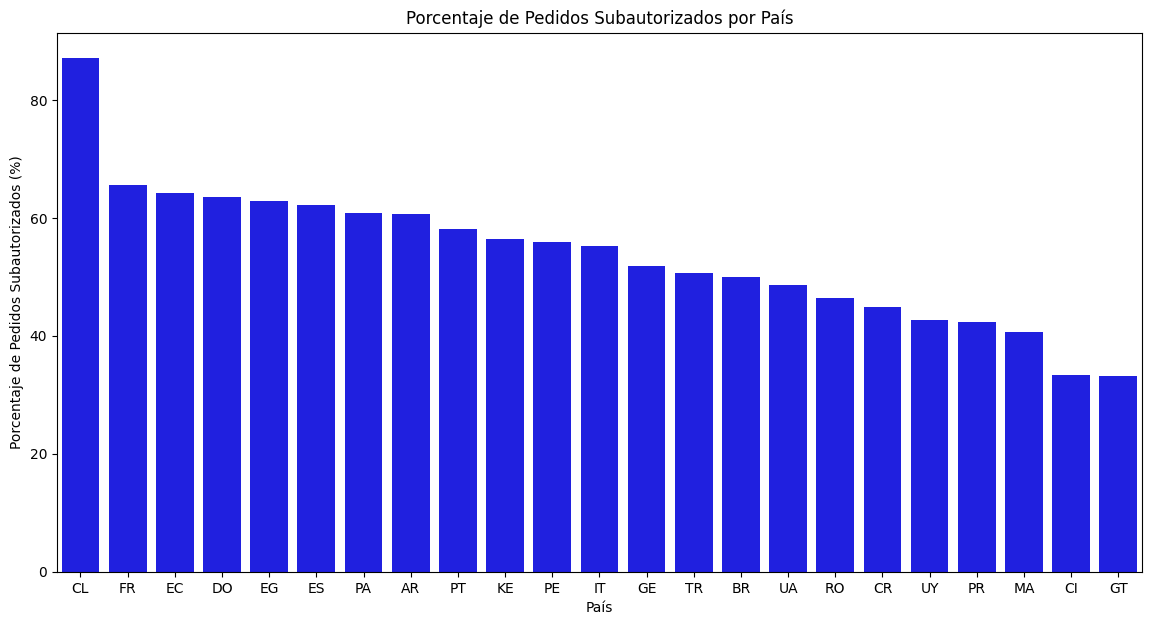

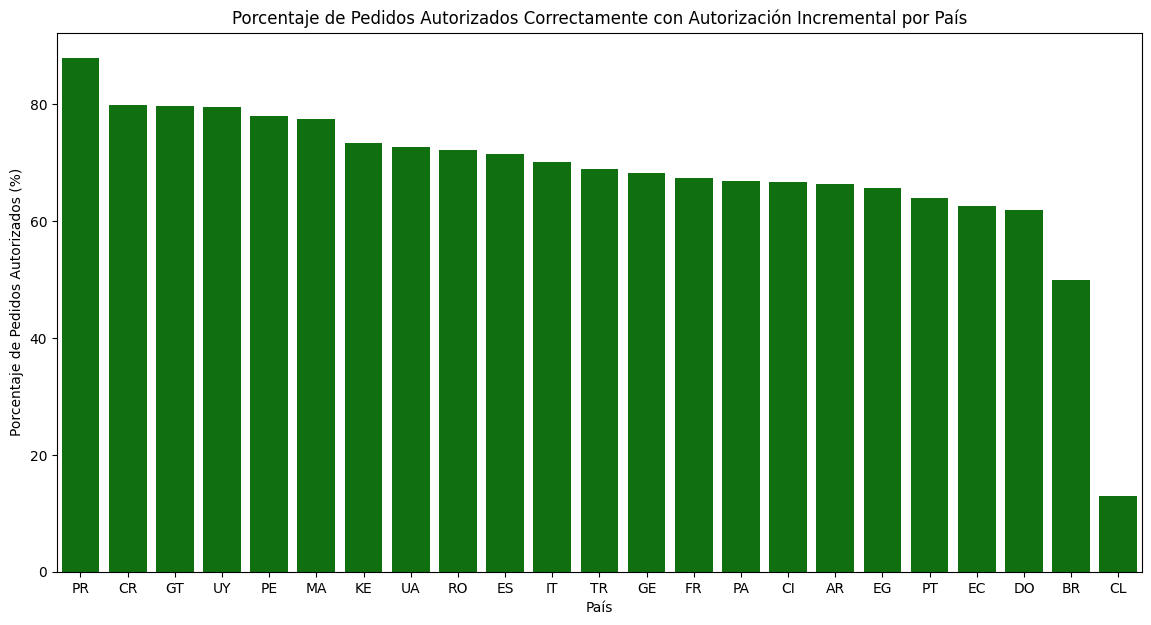

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la visualización del porcentaje de pedidos subautorizados por país
plt.figure(figsize=(14, 7))
sns.barplot(data=subauthorized_by_country_df, x='country_code', y='subauthorized', color='blue')
plt.title('Porcentaje de Pedidos Subautorizados por País')
plt.xlabel('País')
plt.ylabel('Porcentaje de Pedidos Subautorizados (%)')
plt.show()

# Crear la visualización del porcentaje de pedidos autorizados correctamente con una autorización incremental por país
plt.figure(figsize=(14, 7))
sns.barplot(data=authorized_incremental_by_country_df, x='country_code', y='authorized_incremental', color='green')
plt.title('Porcentaje de Pedidos Autorizados Correctamente con Autorización Incremental por País')
plt.xlabel('País')
plt.ylabel('Porcentaje de Pedidos Autorizados (%)')
plt.show()


In [66]:
# Filtrar los pedidos que no se autorizarían con la autorización incremental
unauthorized_orders = fake[~fake['authorized_incremental']]

# Calcular los valores necesarios para capturar el monto restante
unauthorized_orders['extra_amount_needed'] = unauthorized_orders['purchase_total_price'] - unauthorized_orders['products_total'] * 1.20
print("Valores necesarios para capturar el monto restante:")
print(unauthorized_orders[['order_id', 'extra_amount_needed']])


Valores necesarios para capturar el monto restante:
       order_id  extra_amount_needed
0      33557880                3.192
4      33557765                3.048
10     33523444                7.710
12     33530379                0.480
20     33509944                0.426
...         ...                  ...
60371  32004484                9.644
60373  31969645                2.624
60374  31968802                2.298
60380  31965637                2.762
60389  32002620                3.212

[18703 rows x 2 columns]


/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_8856/1369257508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unauthorized_orders['extra_amount_needed'] = unauthorized_orders['purchase_total_price'] - unauthorized_orders['products_total'] * 1.20


In [115]:
# Agrupar los valores por país y calcular el promedio necesario por país
average_extra_amount_by_country = unauthorized_orders.groupby('country_code')['extra_amount_needed'].mean().reset_index()

# Ordenar los valores de manera descendente
average_extra_amount_by_country = average_extra_amount_by_country.sort_values(by='extra_amount_needed', ascending=False)

# Mostrar el DataFrame resultante
print(average_extra_amount_by_country)


   country_code  extra_amount_needed
3            CL            15.507902
15           PA            11.898012
1            BR             9.642000
9            FR             8.225395
12           IT             7.276702
11           GT             6.303113
19           RO             5.494113
22           UY             5.167385
17           PR             4.845000
6            EC             4.656832
16           PE             4.463208
14           MA             4.272158
8            ES             4.229802
18           PT             4.219159
21           UA             4.032561
4            CR             3.812377
0            AR             3.295181
10           GE             3.147861
5            DO             2.730305
13           KE             2.334880
7            EG             1.988379
20           TR             1.938921
2            CI             0.011000


NameError: name 'df' is not defined

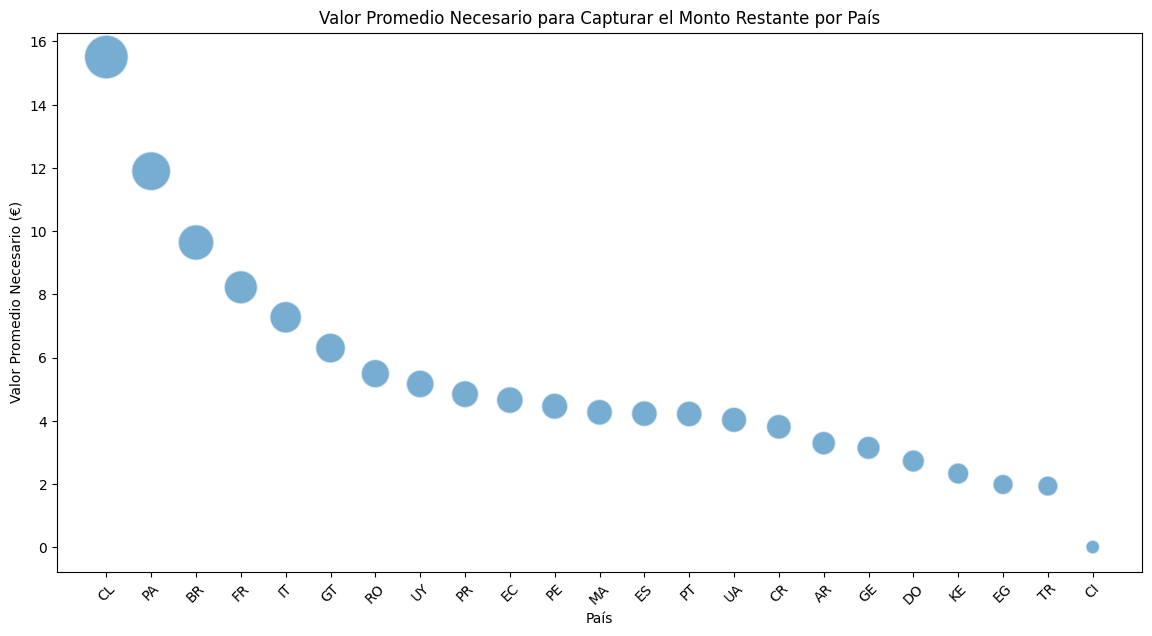

In [124]:
average_extra_amount_by_country['bubble_size'] = average_extra_amount_by_country['extra_amount_needed'] * 100

# Crear la visualización del gráfico de burbujas
plt.figure(figsize=(14, 7))
bubble_plot = sns.scatterplot(
    data=average_extra_amount_by_country, 
    x='country_code', 
    y='extra_amount_needed', 
    size='bubble_size', 
    sizes=(100, 1000), 
    legend=False, 
    alpha=0.6
)
bubble_plot.set_title('Valor Promedio Necesario para Capturar el Monto Restante por País')
bubble_plot.set_xlabel('País')
bubble_plot.set_ylabel('Valor Promedio Necesario (€)')
bubble_plot.tick_params(axis='x', rotation=45)

# Mostrar los valores y códigos de país en las burbujas
for i in range(df.shape[0]):
    plt.text(
        x=average_extra_amount_by_country['country_code'].iloc[i], 
        y=average_extra_amount_by_country['extra_amount_needed'].iloc[i],
        s=f"{average_extra_amount_by_country['country_code'].iloc[i]}\n{average_extra_amount_by_country['extra_amount_needed'].iloc[i]:.2f}", 
        horizontalalignment='center', 
        size='medium', 
        color='black', 
        weight='semibold'
    )

plt.show()

In [67]:
# Calcular el número de pedidos subautorizados por tienda
problematic_stores = fake[fake['subauthorized']].groupby('store_address').size().reset_index(name='subauthorized_orders').sort_values(by='subauthorized_orders', ascending=False)
print("Tiendas con mayor número de pedidos subautorizados:")
print(problematic_stores)

# Calcular el valor monetario de los pedidos subautorizados por tienda
problematic_stores_value = fake[fake['subauthorized']].groupby('store_address')['delivery_cost'].sum().reset_index(name='subauthorized_value').sort_values(by='subauthorized_value', ascending=False)
print("Tiendas con mayor valor monetario en pedidos subautorizados:")
print(problematic_stores_value)


Tiendas con mayor número de pedidos subautorizados:
      store_address  subauthorized_orders
1154          28671                   448
1159          28712                   217
1143          28286                   204
659           14455                   179
558           11694                   160
...             ...                   ...
2251          50843                     1
2252          50850                     1
3580          65912                     1
2257          50992                     1
4565          75114                     1

[4566 rows x 2 columns]
Tiendas con mayor valor monetario en pedidos subautorizados:
      store_address  subauthorized_value
452           10264              1781.13
1153          28669              1185.70
3572          65896              1011.47
435            9855               907.03
659           14455               791.41
...             ...                  ...
2043          47794                 0.01
1691          41413           

In [71]:
# Filtrar los pedidos subautorizados
subauthorized_orders = fake[fake['subauthorized']]
subauthorized_orders.head()


,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,created_month,year,month,day,hour,delivery_cost,subauthorized,authorized_incremental,difference
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64,2019-03-10,2019,3,10,23,4.10,True,False,4.10
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,2019-03-10,2019,3,10,23,3.62,True,False,3.62
5,33512273,2019-03-10 23:57:13,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,2019-03-10,2019,3,10,23,0.08,True,True,0.08
7,33511759,2019-03-10 23:55:21,TR,47493,DeliveredStatus,PAID,2,2.37,2.45,2019-03-10,2019,3,10,23,0.08,True,True,0.08
10,33523444,2019-03-10 23:53:38,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,2019-03-10,2019,3,10,23,8.12,True,False,8.12


In [35]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60400 entries, 0 to 60399
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               60400 non-null  int64         
 1   activation_time_local  60400 non-null  datetime64[ns]
 2   country_code           60400 non-null  object        
 3   store_address          60400 non-null  int64         
 4   final_status           60400 non-null  object        
 5   payment_status         60400 non-null  object        
 6   products               60400 non-null  int64         
 7   products_total         60400 non-null  float64       
 8   purchase_total_price   60400 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 4.1+ MB


In [36]:
fake['created_month'] = fake['activation_time_local'].dt.to_period('D')

In [37]:
fake.head()

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,created_month
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64,2019-03-10
1,33512615,2019-03-10 23:58:32,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,2019-03-10
2,33512451,2019-03-10 23:57:56,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,2019-03-10
3,33530892,2019-03-10 23:57:33,ES,19777,CanceledStatus,PAID,1,12.95,0.00,2019-03-10
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,2019-03-10


ValueError: Invalid RGBA argument: '#100F0F0'

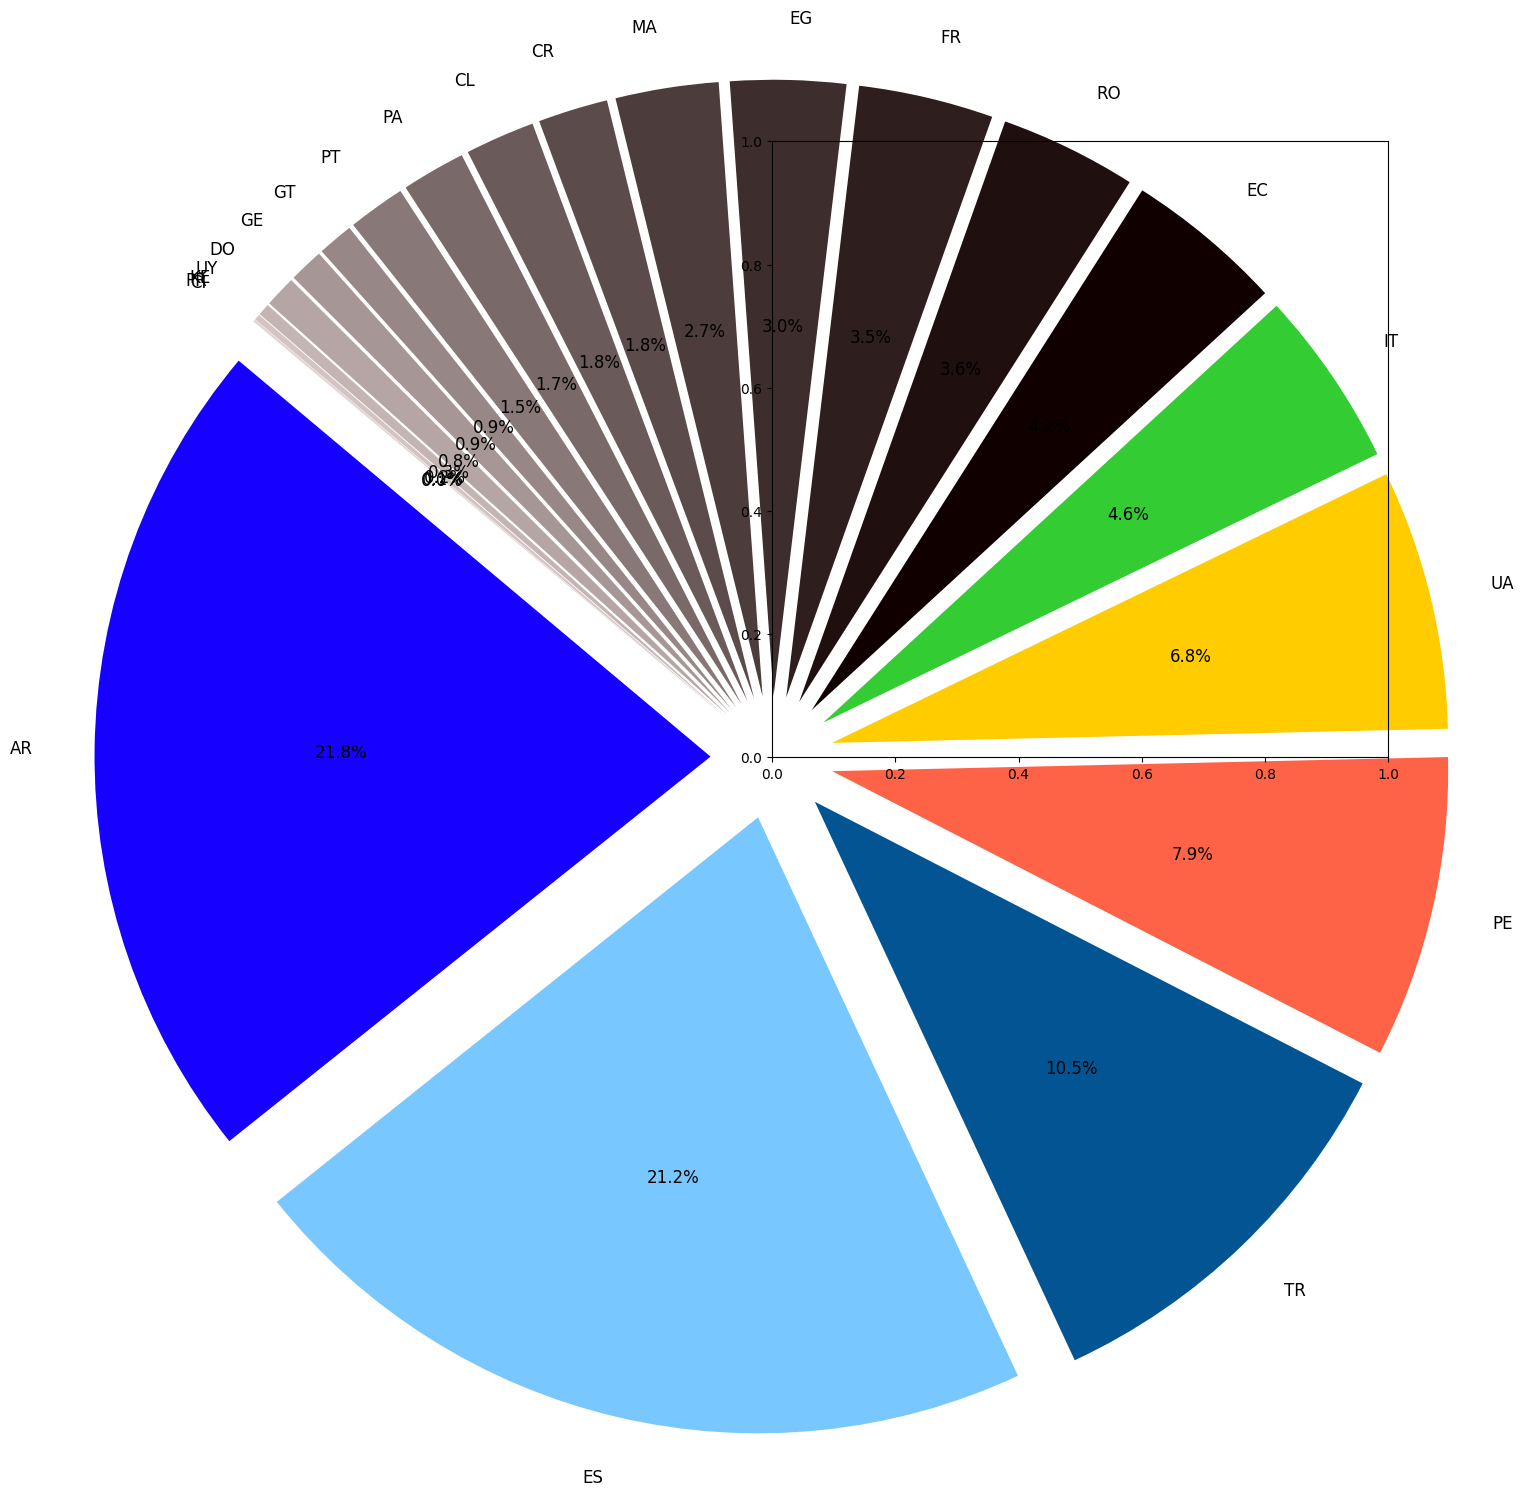

In [38]:
country_counts = fake['country_code'].value_counts()

# Dynamically create the explode list to match the length of country_counts
explode = [0.1] * len(country_counts)

# Define custom colors for each type, add enough colors for the number of unique countries
custom_colors = ['#1600ff', '#79c7ff', '#035493', '#ff6347', '#ffcc00', '#33cc33']  # Add more colors if needed

# Ensure there are enough colors for the pie chart
if len(custom_colors) < len(country_counts):
    custom_colors.extend(['#%06X' % (0x100000 + i * 0x0F0F0F) for i in range(len(country_counts) - len(custom_colors))])

# Creating a pie chart with custom colors
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=custom_colors, explode=explode, textprops={'color': 'Black', 'fontsize': 12})

# Adding title
plt.title('Distribution of Fees by Type')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Showing the plot
plt.show()

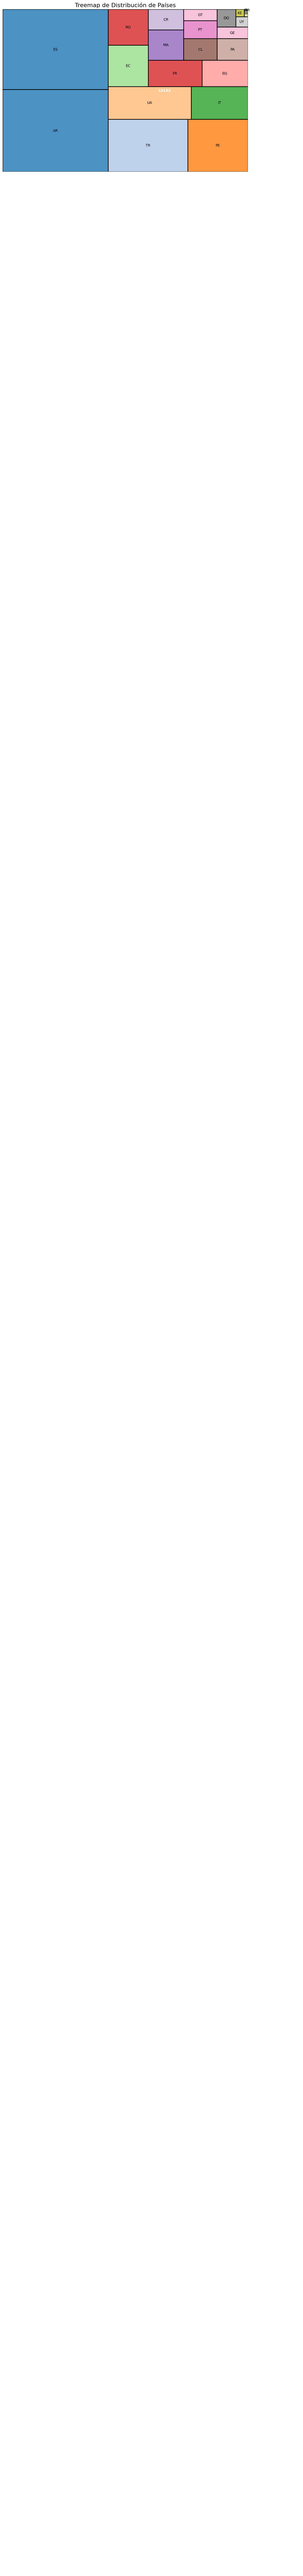

In [ ]:
import squarify


country_counts = fake['country_code'].value_counts()

num_colors = len(country_counts)
cmap = plt.get_cmap('tab20')  # Puedes cambiar 'tab20' por otro colormap si lo deseas
colors = [cmap(i / num_colors) for i in range(num_colors)]

# Calcular los rectángulos para el treemap
rects = squarify.squarify(sizes=country_counts.values, x=0, y=0, dx=100, dy=100)

# Crear el treemap
plt.figure(figsize=(12, 8))
ax = plt.gca()  # Obtener el eje actual

# Dibujar el treemap con los colores y bordes
squarify.plot(sizes=country_counts.values, label=country_counts.index, alpha=0.8, color=colors, edgecolor="black", linewidth=2, ax=ax)

# Añadir título
plt.title('Treemap de Distribución de Países', fontsize=16)

# Añadir los valores numéricos dentro de los rectángulos
for value, rect in zip(country_counts.values, rects):
    x, y, w, h = rect['x'], rect['y'], rect['dx'], rect['dy']
    # Ajustar el tamaño del texto para que se ajuste dentro del rectángulo
    font_size = min(12, 0.1 * min(w, h))
    ax.text(x + w / 2, y + h / 2, str(value), va='center', ha='center', color='white', fontsize=font_size, weight='bold')

# Ajustar los límites de los ejes para que coincidan con el tamaño del treemap
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Eliminar ejes
plt.axis('off')

# Mostrar el gráfico
plt.show()

In [61]:


for column in fake.columns:
    print("Value counts for column", column, ":")
    print(fake[column].value_counts())
    print()


Value counts for column order_id :
order_id
33557880    1
32574841    1
32541754    1
32535994    1
32535987    1
           ..
33076083    1
33076028    1
33043346    1
33042711    1
32001318    1
Name: count, Length: 60400, dtype: int64

Value counts for column activation_time_local :
activation_time_local
2019-03-07 10:03:04    10
2019-03-08 09:03:01     8
2019-03-02 09:03:01     7
2019-03-04 20:03:06     7
2019-03-05 10:03:06     7
                       ..
2019-03-07 21:26:32     1
2019-03-07 21:26:29     1
2019-03-07 21:26:19     1
2019-03-07 21:26:18     1
2019-03-01 00:01:00     1
Name: count, Length: 56255, dtype: int64

Value counts for column country_code :
country_code
AR    13192
ES    12806
TR     6348
PE     4785
UA     4119
IT     2808
EC     2508
RO     2167
FR     2136
EG     1828
MA     1632
CR     1107
CL     1104
PA     1013
PT      909
GT      567
GE      546
DO      500
UY      190
KE       94
PR       33
CI        6
BR        2
Name: count, dtype: int64

Value c

In [45]:
fake['delivery_cost'] = fake['purchase_total_price'] - fake['products_total']

In [46]:
fake.head()

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,created_month,year,month,day,hour,delivery_cost
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64,2019-03-10,2019,3,10,23,4.10
1,33512615,2019-03-10 23:58:32,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,2019-03-10,2019,3,10,23,0.00
2,33512451,2019-03-10 23:57:56,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,2019-03-10,2019,3,10,23,0.00
3,33530892,2019-03-10 23:57:33,ES,19777,CanceledStatus,PAID,1,12.95,0.00,2019-03-10,2019,3,10,23,-12.95
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,2019-03-10,2019,3,10,23,3.62


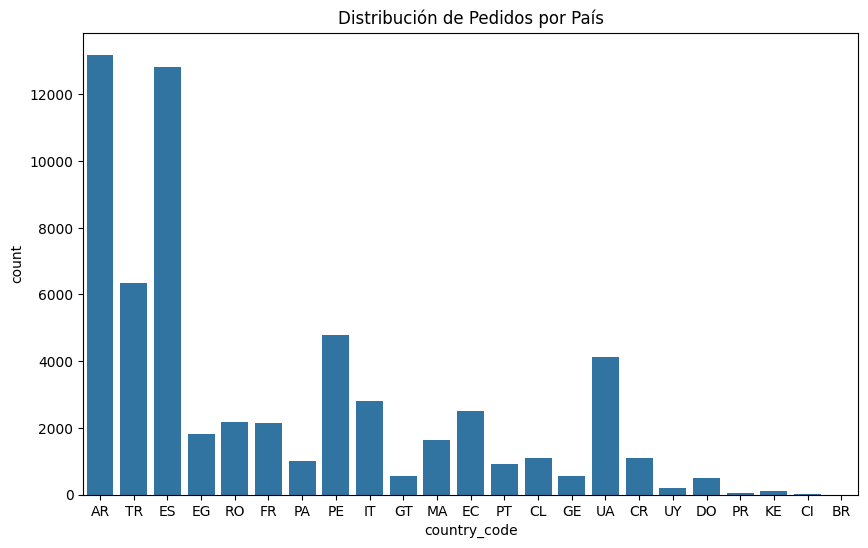

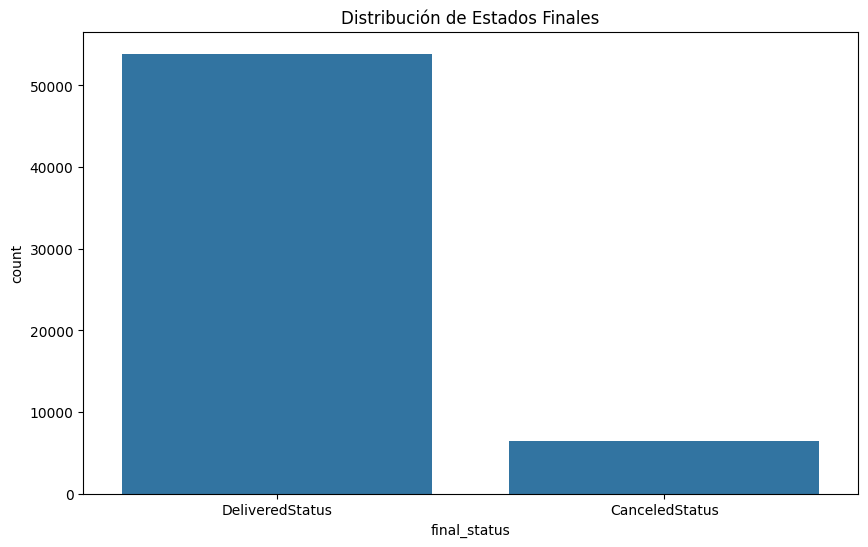

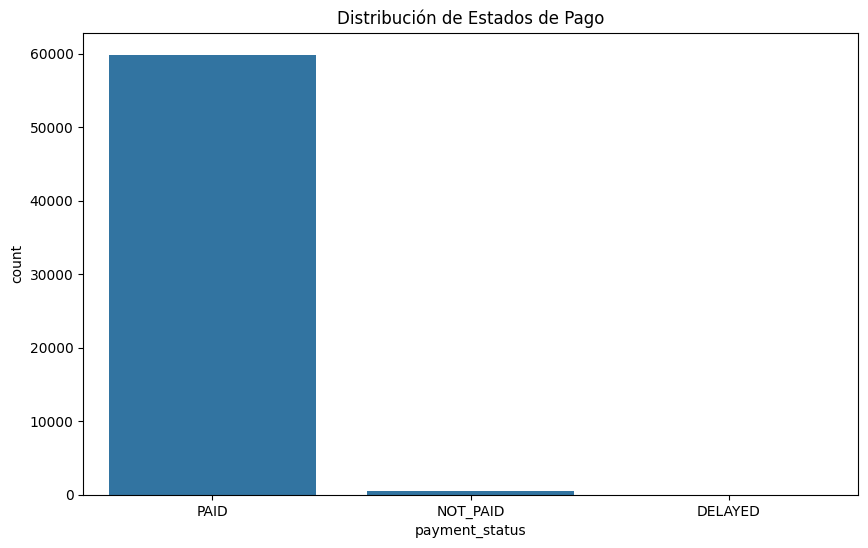

In [ ]:
# Distribución de country_code
plt.figure(figsize=(10, 6))
sns.countplot(data=fake, x='country_code')
plt.title('Distribución de Pedidos por País')
plt.show()

# Distribución de final_status
plt.figure(figsize=(10, 6))
sns.countplot(data=fake, x='final_status')
plt.title('Distribución de Estados Finales')
plt.show()

# Distribución de payment_status
plt.figure(figsize=(10, 6))
sns.countplot(data=fake, x='payment_status')
plt.title('Distribución de Estados de Pago')
plt.show()

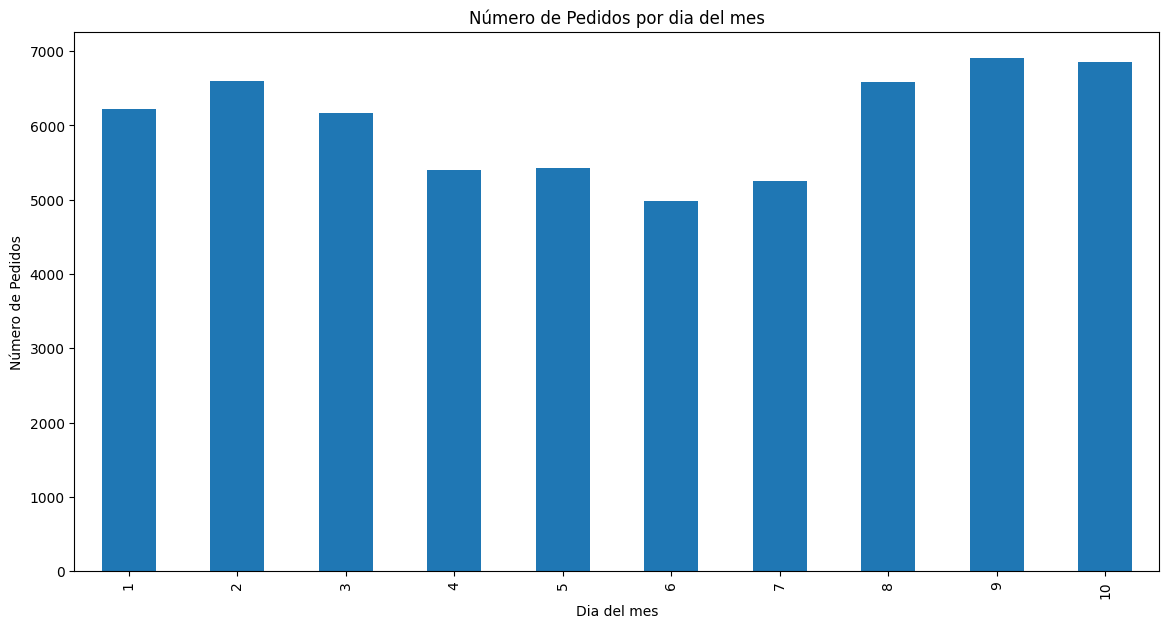

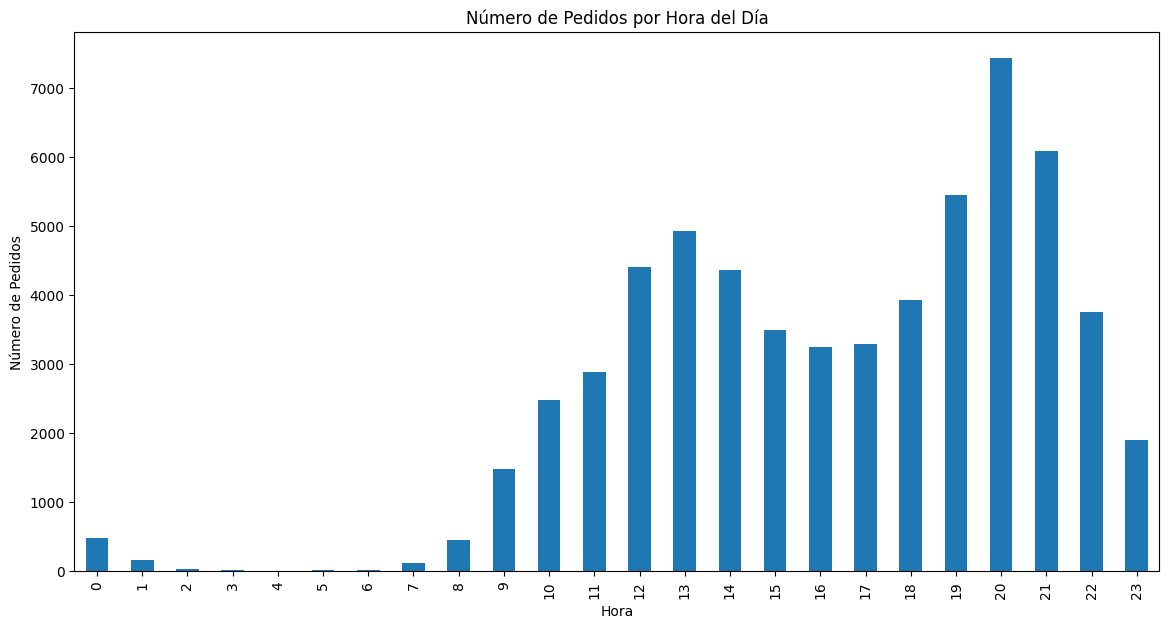

In [42]:
# Convertir 'activation_time_local' a datetime
fake['activation_time_local'] = pd.to_datetime(fake['activation_time_local'])


fake['day'] = fake['activation_time_local'].dt.day
fake['hour'] = fake['activation_time_local'].dt.hour

# Pedidos por mes
plt.figure(figsize=(14, 7))
fake.groupby('day').size().plot(kind='bar')
plt.title('Número de Pedidos por dia del mes')
plt.xlabel('Dia del mes')
plt.ylabel('Número de Pedidos')
plt.show()

# Pedidos por hora
plt.figure(figsize=(14, 7))
fake.groupby('hour').size().plot(kind='bar')
plt.title('Número de Pedidos por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Número de Pedidos')
plt.show()


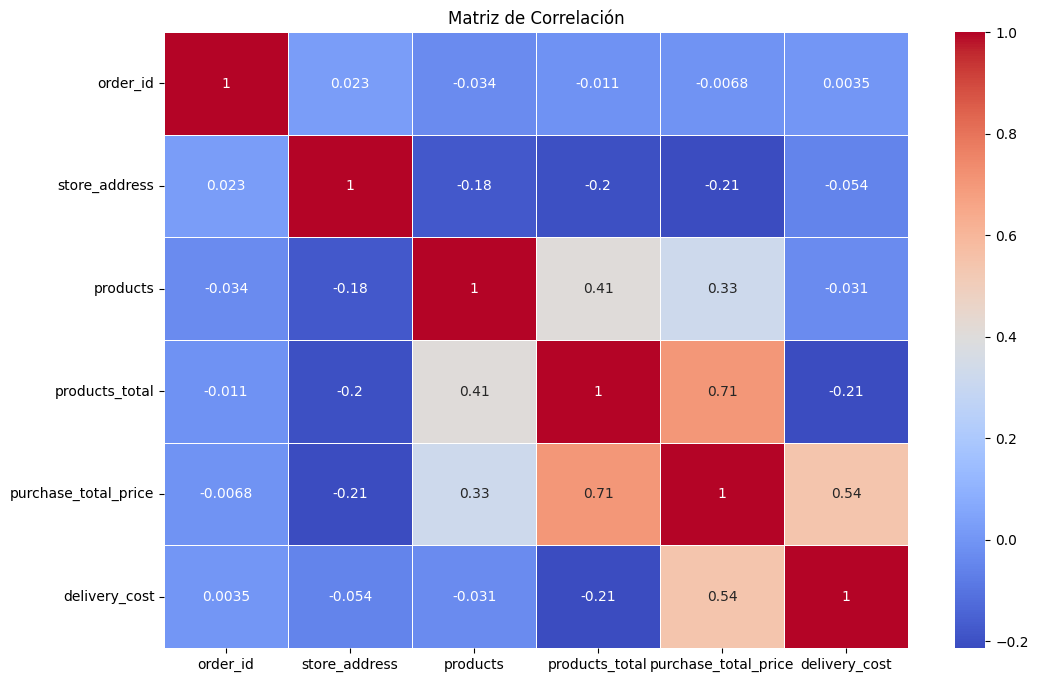

In [47]:
numerical_cols = fake.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = fake[numerical_cols].corr()

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

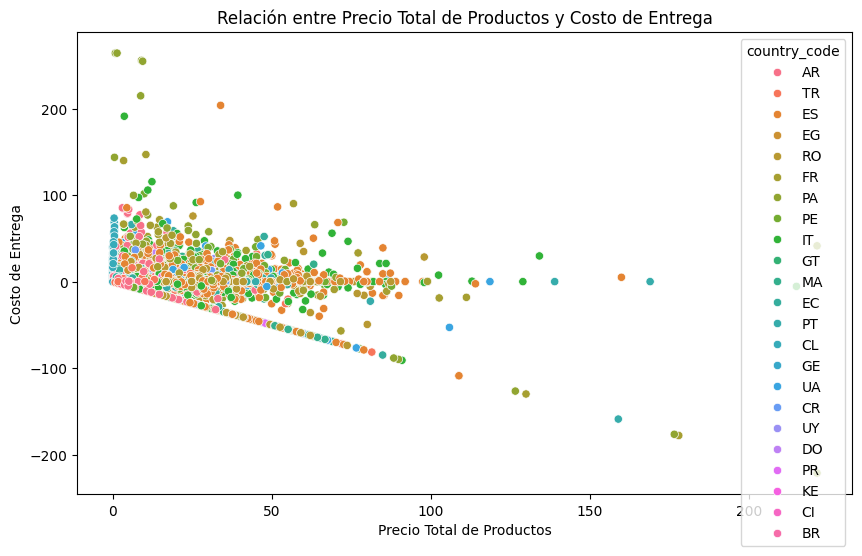

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fake, x='products_total', y='delivery_cost', hue='country_code')
plt.title('Relación entre Precio Total de Productos y Costo de Entrega')
plt.xlabel('Precio Total de Productos')
plt.ylabel('Costo de Entrega')
plt.show()

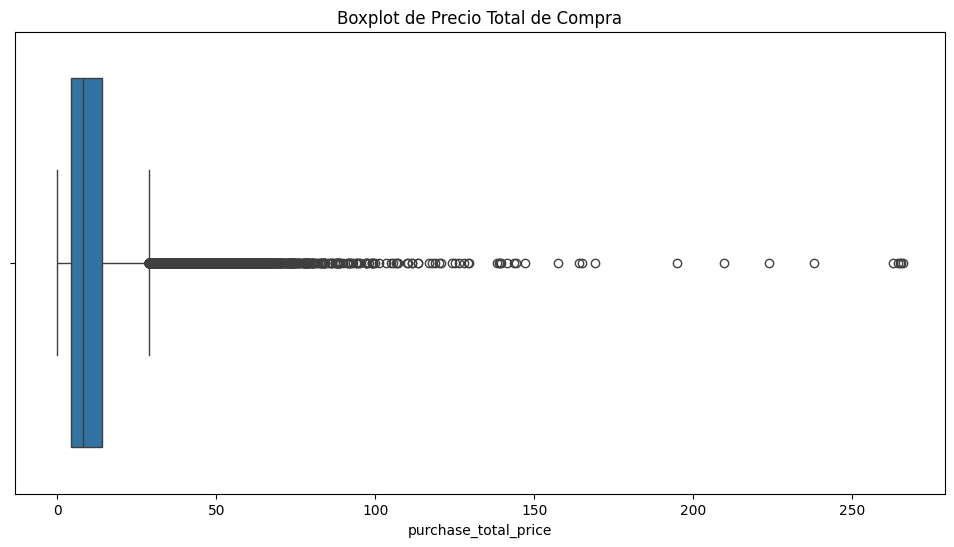

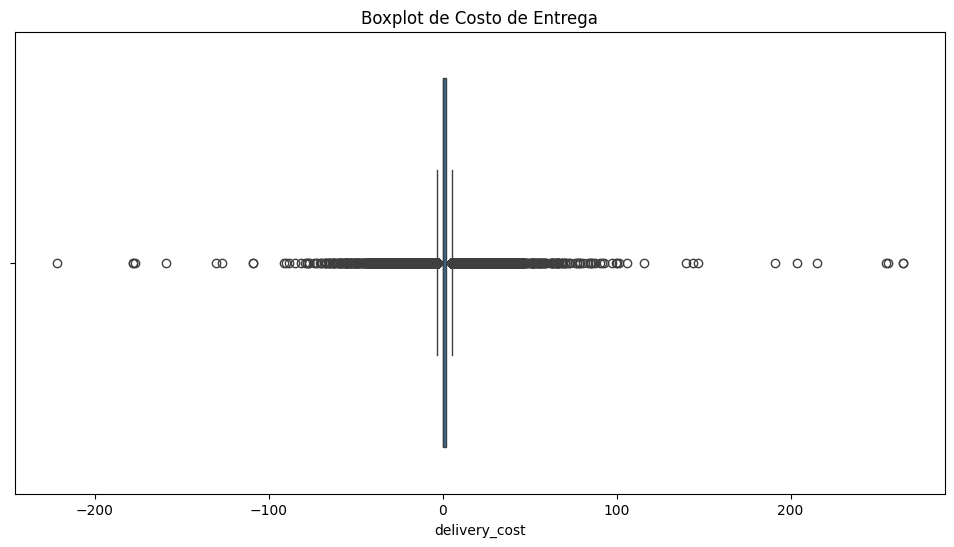

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=fake, x='purchase_total_price')
plt.title('Boxplot de Precio Total de Compra')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=fake, x='delivery_cost')
plt.title('Boxplot de Costo de Entrega')
plt.show()

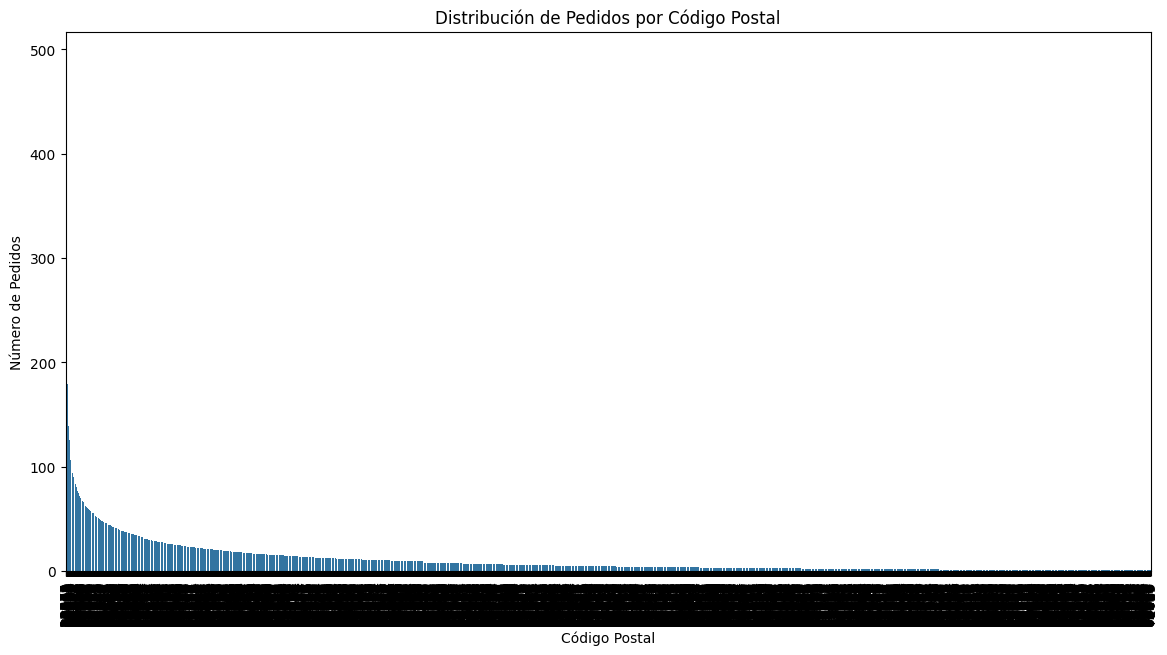

In [50]:
# Distribución de pedidos por código postal
plt.figure(figsize=(14, 7))
sns.countplot(data=fake, x='store_address', order=fake['store_address'].value_counts().index)
plt.title('Distribución de Pedidos por Código Postal')
plt.xlabel('Código Postal')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=90)  # Rotar etiquetas de los códigos postales si son muchos
plt.show()

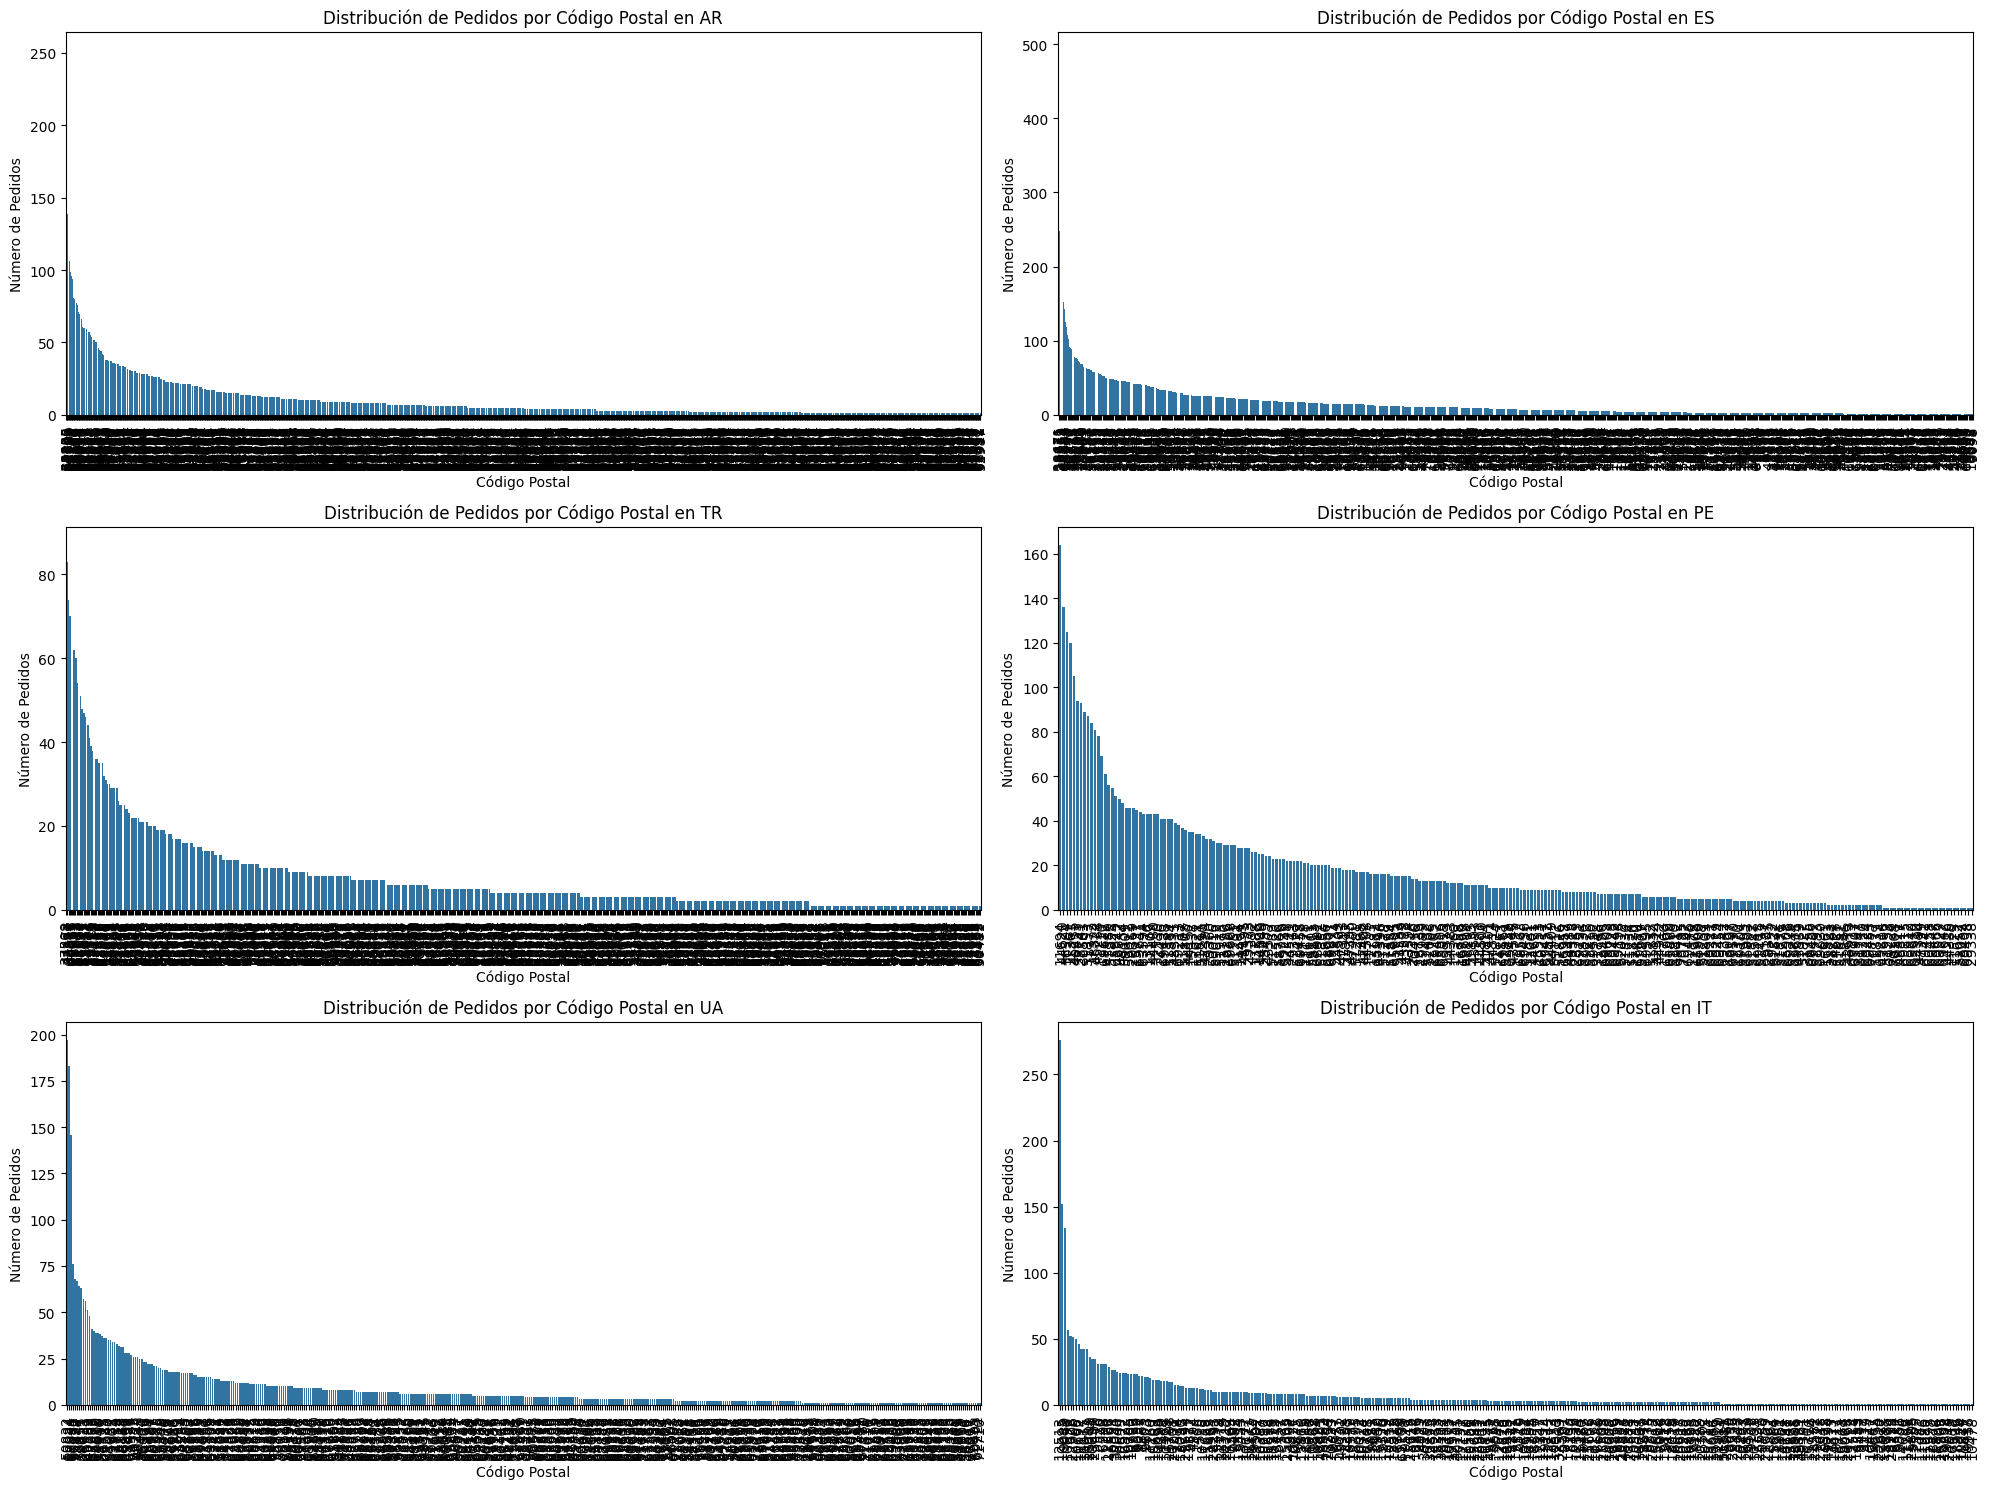

In [51]:
# Obtener los 6 países con el mayor número de pedidos
top_countries = fake['country_code'].value_counts().head(6).index

# Crear una figura con 6 subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # 3 filas y 2 columnas para 6 gráficos
axes = axes.flatten()  # Aplanar los ejes para facilitar la iteración

# Generar un gráfico para cada país
for i, country in enumerate(top_countries):
    country_data = fake[fake['country_code'] == country]
    sns.countplot(data=country_data, x='store_address', order=country_data['store_address'].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribución de Pedidos por Código Postal en {country}')
    axes[i].set_xlabel('Código Postal')
    axes[i].set_ylabel('Número de Pedidos')
    axes[i].tick_params(axis='x', rotation=90)

# Ajustar el layout
plt.tight_layout()
plt.show()

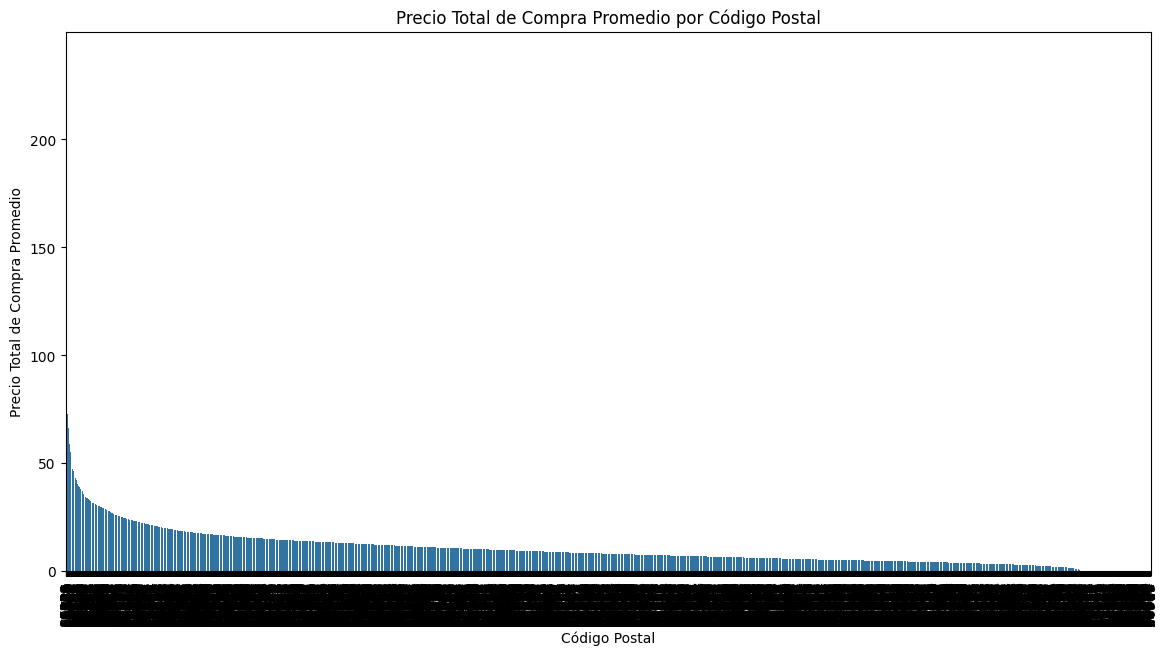

In [52]:
# Precio total de compra promedio por código postal
plt.figure(figsize=(14, 7))
avg_purchase_price = fake.groupby('store_address')['purchase_total_price'].mean().reset_index()
sns.barplot(data=avg_purchase_price, x='store_address', y='purchase_total_price', order=avg_purchase_price.sort_values('purchase_total_price', ascending=False)['store_address'])
plt.title('Precio Total de Compra Promedio por Código Postal')
plt.xlabel('Código Postal')
plt.ylabel('Precio Total de Compra Promedio')
plt.xticks(rotation=90)  # Rotar etiquetas de los códigos postales si son muchos
plt.show()

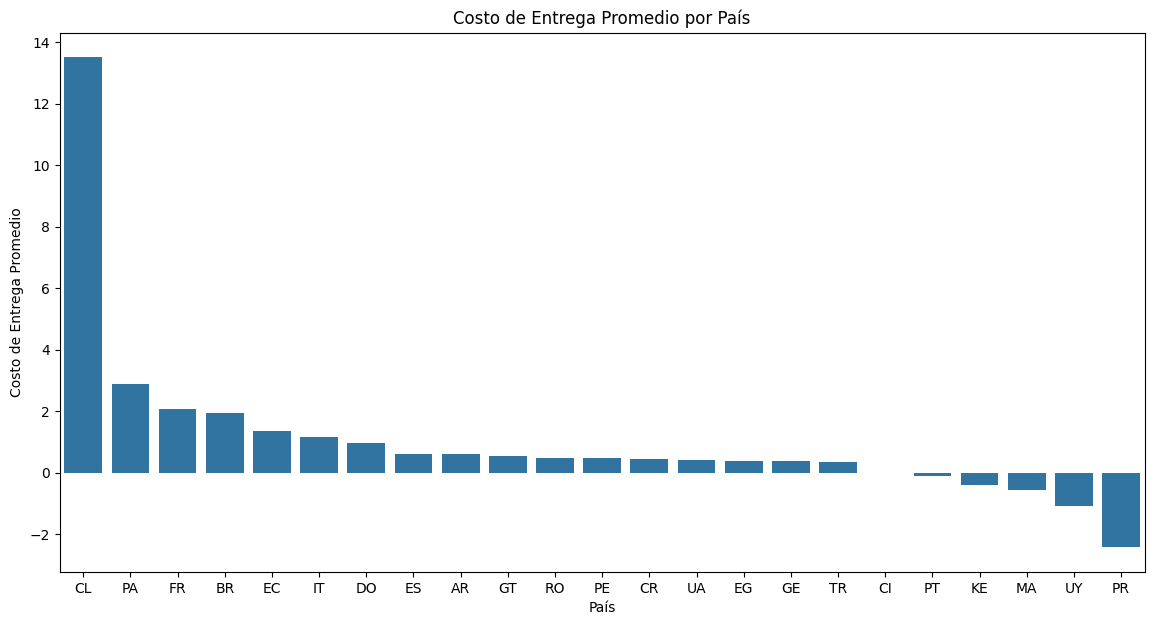

In [53]:
avg_delivery_cost_per_country = fake.groupby('country_code')['delivery_cost'].mean().reset_index()

# Crear un gráfico de barras para mostrar el costo de entrega promedio por país
plt.figure(figsize=(14, 7))
sns.barplot(data=avg_delivery_cost_per_country, x='country_code', y='delivery_cost', order=avg_delivery_cost_per_country.sort_values('delivery_cost', ascending=False)['country_code'])
plt.title('Costo de Entrega Promedio por País')
plt.xlabel('País')
plt.ylabel('Costo de Entrega Promedio')
plt.show()

In [54]:
negative_delivery_cost = fake[fake['delivery_cost'] < 0]

# Calcular el total de órdenes por país
total_orders_per_country = fake['country_code'].value_counts().reset_index()
total_orders_per_country.columns = ['country_code', 'total_orders']

# Calcular el total de órdenes con delivery_cost negativo por país
negative_orders_per_country = negative_delivery_cost['country_code'].value_counts().reset_index()
negative_orders_per_country.columns = ['country_code', 'negative_orders']

# Unir los dos DataFrames
merged = pd.merge(total_orders_per_country, negative_orders_per_country, on='country_code', how='left')
merged['negative_orders'] = merged['negative_orders'].fillna(0)  # Rellenar NaN con 0

# Calcular el porcentaje de órdenes con delivery_cost negativo por país
merged['negative_percentage'] = (merged['negative_orders'] / merged['total_orders']) * 100

# Mostrar el DataFrame resultante
print(merged)



   country_code  total_orders  negative_orders  negative_percentage
0            AR         13192             2842            21.543360
1            ES         12806             3195            24.949243
2            TR          6348             1130            17.800882
3            PE          4785              866            18.098224
4            UA          4119              793            19.252246
5            IT          2808              852            30.341880
6            EC          2508              431            17.185008
7            RO          2167              474            21.873558
8            FR          2136              607            28.417603
9            EG          1828              340            18.599562
10           MA          1632              333            20.404412
11           CR          1107              348            31.436314
12           CL          1104              143            12.952899
13           PA          1013              202  

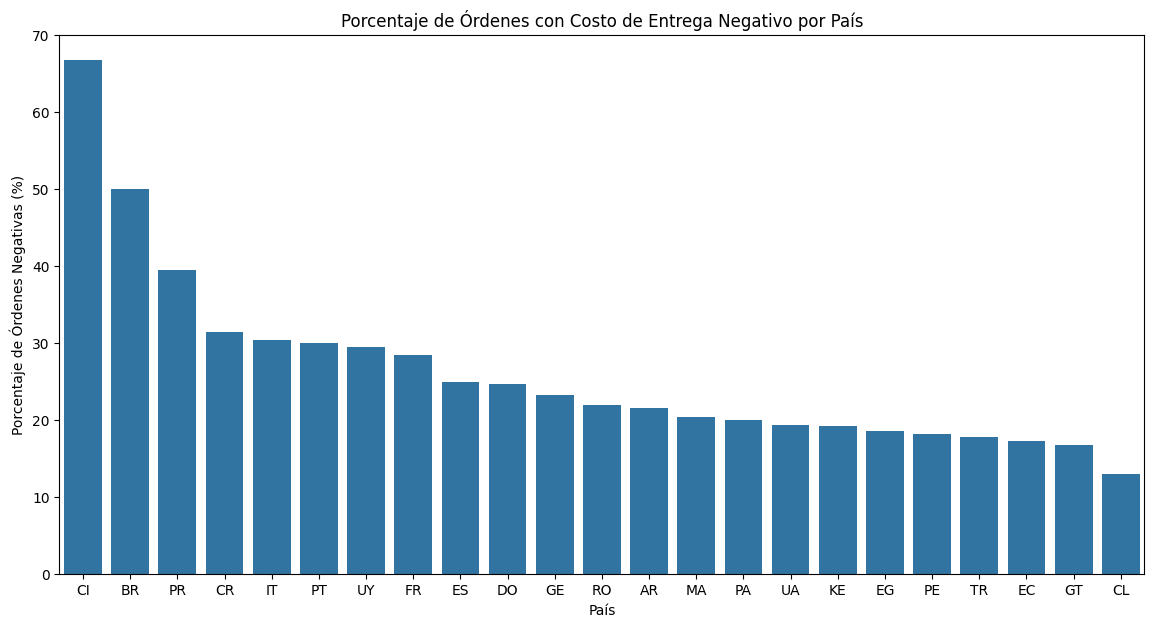

In [55]:
# Crear una visualización del porcentaje de órdenes con delivery_cost negativo por país
plt.figure(figsize=(14, 7))
sns.barplot(data=merged, x='country_code', y='negative_percentage', order=merged.sort_values('negative_percentage', ascending=False)['country_code'])
plt.title('Porcentaje de Órdenes con Costo de Entrega Negativo por País')
plt.xlabel('País')
plt.ylabel('Porcentaje de Órdenes Negativas (%)')
plt.show()

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_8856/1798384009.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged, x='country_code', y='negative_percentage', ax=ax1, palette='Blues_d')


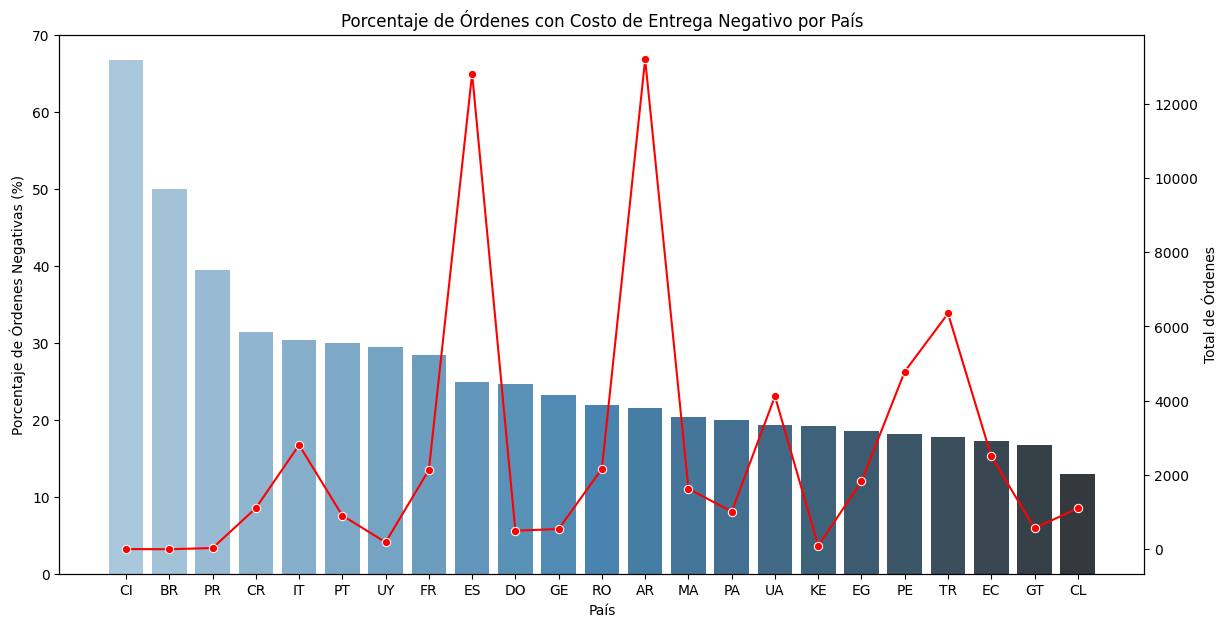

In [56]:
# Ordenar los datos por porcentaje negativo
merged = merged.sort_values('negative_percentage', ascending=False)

# Crear la visualización con un eje Y secundario
fig, ax1 = plt.subplots(figsize=(14, 7))

# Crear el gráfico de barras para el porcentaje de órdenes negativas
sns.barplot(data=merged, x='country_code', y='negative_percentage', ax=ax1, palette='Blues_d')
ax1.set_title('Porcentaje de Órdenes con Costo de Entrega Negativo por País')
ax1.set_xlabel('País')
ax1.set_ylabel('Porcentaje de Órdenes Negativas (%)')

# Crear el eje Y secundario para el total de órdenes
ax2 = ax1.twinx()
sns.lineplot(data=merged, x='country_code', y='total_orders', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Total de Órdenes')

plt.show()

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_8856/674433354.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_delivery_cost_spain['activation_time_local'] = pd.to_datetime(negative_delivery_cost_spain['activation_time_local'])
/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_8856/674433354.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_spain, x='activation_time_local', y='negative_percentage', ax=ax1, palette='Blues_d')
/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_8856/674433354.py:40: UserWarning: set_ticklabels() should only be u

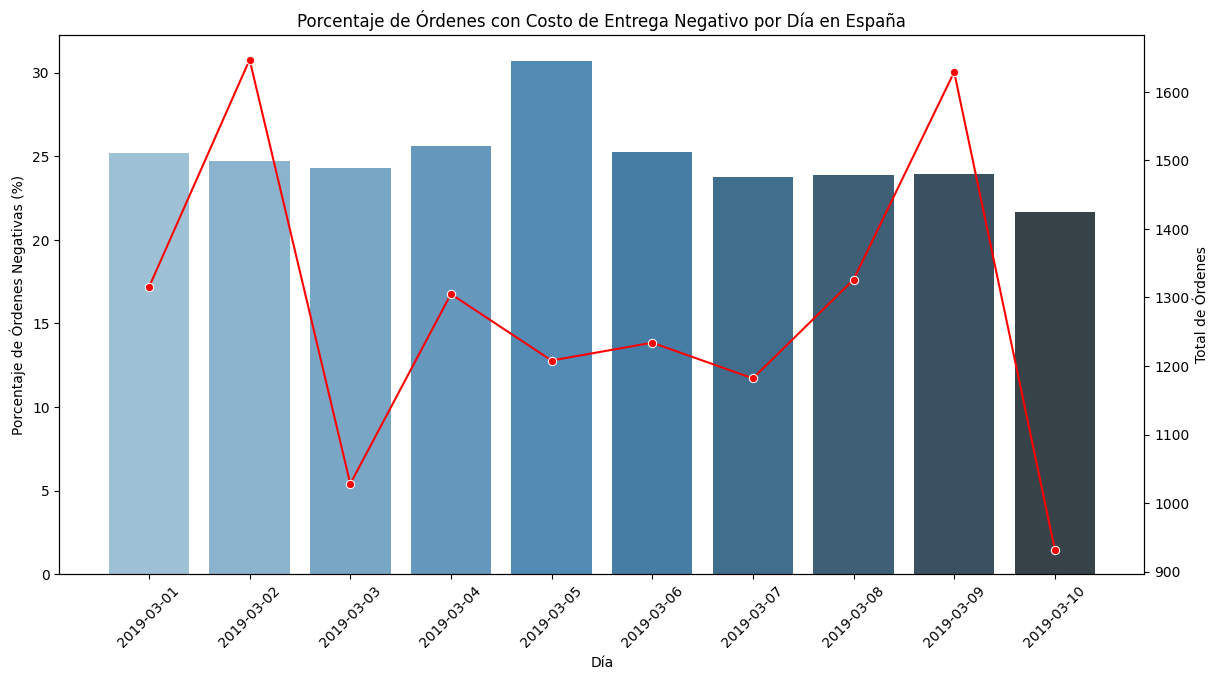

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama fake
# Si aún no has cargado tu dataset, hazlo de la siguiente manera
# fake = pd.read_csv('tu_dataset.csv')  # Reemplaza con la carga de tu propio dataset

# Filtrar las filas con delivery_cost negativo para España
negative_delivery_cost_spain = fake[(fake['country_code'] == 'ES') & (fake['delivery_cost'] < 0)]

# Convertir 'activation_time_local' a datetime si no está en formato datetime
fake['activation_time_local'] = pd.to_datetime(fake['activation_time_local'])
negative_delivery_cost_spain['activation_time_local'] = pd.to_datetime(negative_delivery_cost_spain['activation_time_local'])

# Calcular el total de órdenes por día para España
total_orders_per_day_spain = fake[fake['country_code'] == 'ES'].groupby(fake['activation_time_local'].dt.date).size().reset_index(name='total_orders')

# Calcular el total de órdenes con delivery_cost negativo por día para España
negative_orders_per_day_spain = negative_delivery_cost_spain.groupby(negative_delivery_cost_spain['activation_time_local'].dt.date).size().reset_index(name='negative_orders')

# Unir los dos DataFrames
merged_spain = pd.merge(total_orders_per_day_spain, negative_orders_per_day_spain, on='activation_time_local', how='left')
merged_spain['negative_orders'] = merged_spain['negative_orders'].fillna(0)  # Rellenar NaN con 0

# Calcular el porcentaje de órdenes con delivery_cost negativo por día para España
merged_spain['negative_percentage'] = (merged_spain['negative_orders'] / merged_spain['total_orders']) * 100

# Convertir la fecha a string para evitar problemas con seaborn
merged_spain['activation_time_local'] = merged_spain['activation_time_local'].astype(str)

# Crear la visualización con un eje Y secundario
fig, ax1 = plt.subplots(figsize=(14, 7))

# Crear el gráfico de barras para el porcentaje de órdenes negativas
sns.barplot(data=merged_spain, x='activation_time_local', y='negative_percentage', ax=ax1, palette='Blues_d')
ax1.set_title('Porcentaje de Órdenes con Costo de Entrega Negativo por Día en España')
ax1.set_xlabel('Día')
ax1.set_ylabel('Porcentaje de Órdenes Negativas (%)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Crear el eje Y secundario para el total de órdenes
ax2 = ax1.twinx()
sns.lineplot(data=merged_spain, x='activation_time_local', y='total_orders', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Total de Órdenes')

plt.show()


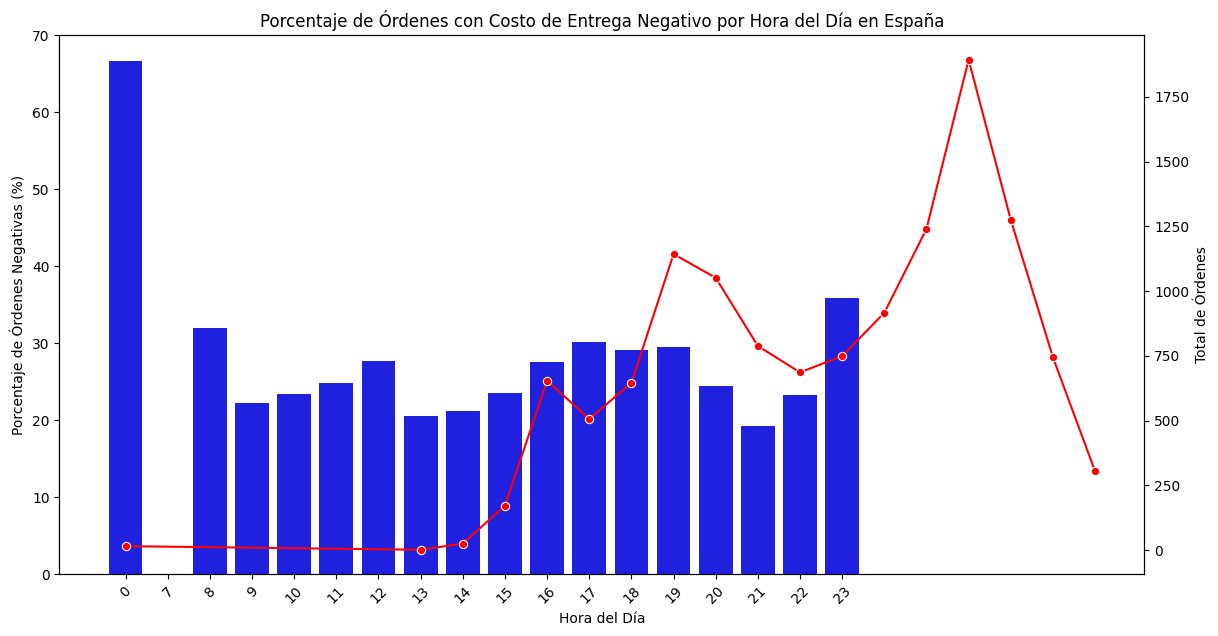

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama fake
# Si aún no has cargado tu dataset, hazlo de la siguiente manera
# fake = pd.read_csv('tu_dataset.csv')  # Reemplaza con la carga de tu propio dataset

# Filtrar las filas con delivery_cost negativo para España
negative_delivery_cost_spain = fake[(fake['country_code'] == 'ES') & (fake['delivery_cost'] < 0)]

# Convertir 'activation_time_local' a datetime si no está en formato datetime
fake['activation_time_local'] = pd.to_datetime(fake['activation_time_local'])
negative_delivery_cost_spain.loc[:, 'activation_time_local'] = pd.to_datetime(negative_delivery_cost_spain['activation_time_local'])

# Calcular el total de órdenes por hora del día para España
total_orders_per_hour_spain = fake[fake['country_code'] == 'ES'].groupby(fake['activation_time_local'].dt.hour).size().reset_index(name='total_orders')

# Calcular el total de órdenes con delivery_cost negativo por hora del día para España
negative_orders_per_hour_spain = negative_delivery_cost_spain.groupby(negative_delivery_cost_spain['activation_time_local'].dt.hour).size().reset_index(name='negative_orders')

# Unir los dos DataFrames
merged_spain = pd.merge(total_orders_per_hour_spain, negative_orders_per_hour_spain, on='activation_time_local', how='left')
merged_spain['negative_orders'] = merged_spain['negative_orders'].fillna(0)  # Rellenar NaN con 0

# Calcular el porcentaje de órdenes con delivery_cost negativo por hora del día para España
merged_spain['negative_percentage'] = (merged_spain['negative_orders'] / merged_spain['total_orders']) * 100

# Renombrar la columna para claridad
merged_spain.rename(columns={'activation_time_local': 'hour'}, inplace=True)

# Crear la visualización con un eje Y secundario
fig, ax1 = plt.subplots(figsize=(14, 7))

# Crear el gráfico de barras para el porcentaje de órdenes negativas
sns.barplot(data=merged_spain, x='hour', y='negative_percentage', ax=ax1, color='blue')
ax1.set_title('Porcentaje de Órdenes con Costo de Entrega Negativo por Hora del Día en España')
ax1.set_xlabel('Hora del Día')
ax1.set_ylabel('Porcentaje de Órdenes Negativas (%)')
ax1.set_xticks(range(len(merged_spain['hour'])))
ax1.set_xticklabels(merged_spain['hour'], rotation=45)

# Crear el eje Y secundario para el total de órdenes
ax2 = ax1.twinx()
sns.lineplot(data=merged_spain, x='hour', y='total_orders', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Total de Órdenes')

plt.show()
